#### Kontrol Automatikoa.Maiatzeko deialdia (2024)

##### 2. problema
Kontrol sistema batean, kontrol diskretua ezartzen da, planta eta berrelikadura izanik $G(s)=\displaystyle\frac{(s^{2}+15.18\,s+121)}{s\,(s+1)\,(s^{2}+14.4\,s+64)}$ eta $H(s)=1$ Maiztasun eremuko teknikak erabiliz kontrolagailu bat diseinatu, hurrengo helburuak betetzeko :

• Egonkorreko errorea arrapala sarreraren aurrean $e_{ss}\leq\%20$

• Gaindiketa maila sarreraren aurrean $\leq\%10$.

Hau da eskatzen dena:

    (a) Aukeratu laginketa periodo egoki bat, azalduz arrazoiak. Diseinatu kontrolagailua eta aztertu portaera begizta itxian, maila sarreraren aurrean (bai irteera, bai kontrol seinalea) 

    (b) Diseinua egin eta gero, baloratu hasieran aukeratutako laginketa periodoa. Era berean, azaldu erabilitako sare mota eta azaldu ea beste sare mota ezberdin bat erabili ahal den.

#### Ebazpena

Lehengo sartu datuak

In [1]:
s=%s;
g=(s^2+15.18*s+121)/s/(s+1)/(s^2+14.4*s+64);g.dt='c'

ess = 0.2
Kv=1/ess
R=10/100
d=1/sqrt((%pi/log(R))^2+1)

 g = [rational] of s
        121 +15.18s +s^2       
   --------------------------  
   64s +78.4s^2 +15.4s^3 +s^4  
 ess = 
   0.2
 Kv = 
   5.
 R = 
   0.1
 d = 
   0.5911550


Lehengo pasu bezala, irabazia konpentsatu behar da eta Bode diagrama egingo da, ikusteko zein den dugun fase margina, jakinda, nahi dugula:

$FM=100\delta \sim 59$


 K = 
   2.6446281


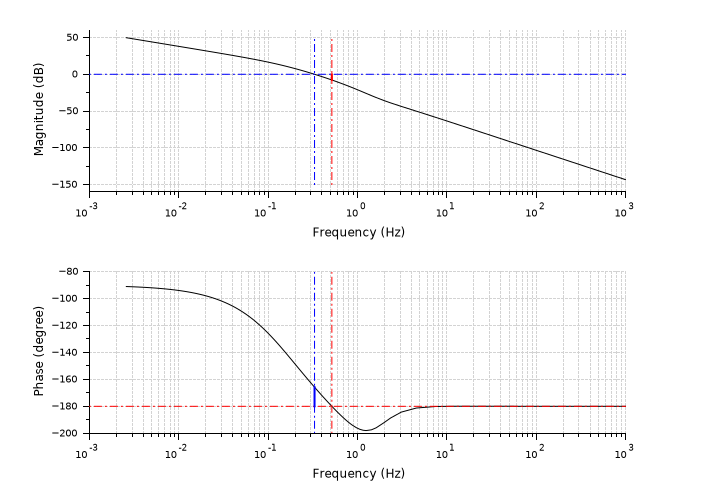

In [8]:
%plot inline
K=Kv/horner(s*g,0)

scf(1);
show_margins(K*g)

Irabazi kritikoko maiztasuna da $\omega_{ik} = 0.33\, 2\pi$. Eta fase margina $FM= 180-166=24º$

Beraz, igo behar dugu, 45º gutxienez. Irabili daiteke atzerapen sarea edo aurrerapena, baina fasea ikusita, errazagoa da atzerapen sarea. 

Ikusten den bezala, irabazi kritikoko maiztasun berri bezala aukeratuz da $\omega_{ik} = 0.052\, 2\pi$, lortzen da nahi den FM Horretarako jaitsi behar dira $$\sim 23$ db. Beraz, kalkulatu ahal dugu sarea

In [6]:
a= 10^(-23/20)
wik=0.052*2*%pi
Ta=1/a/(wik/10)
sarea = (1+a*Ta*s)/(1+Ta*s)

 a = 
   0.0707946
 wik = 
   0.3267256
 Ta = 
   432.33141
 sarea = [rational] of s
   1 +30.60672s   
   -------------  
   1 +432.33141s  


Orain konprobatu dezakegu diseinua

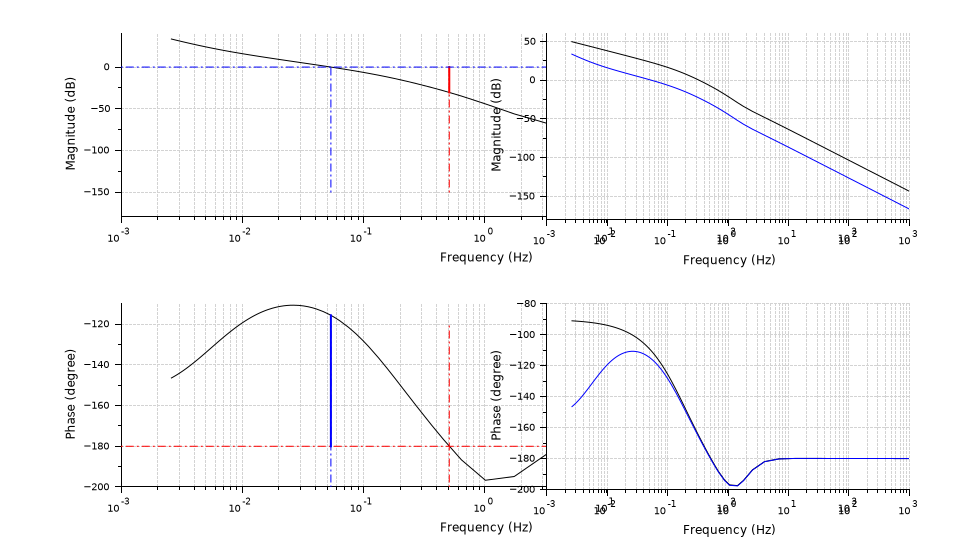

In [12]:
%plot inline
subplot(1,2,1)
show_margins(K*sarea*g)
subplot(1,2,2)
bode([K*g;K*sarea*g])


Ikusten da diseinua nahiko ondo joan dela, nahiz eta FM pixka galdu den, (5-6º).

Orain denbora eremuan aztertu dezakegu emaitza

Kalkulatu daiteke gaindiketa $R= \% (0.746-0.709)/0.709 *100=\%5.2 $ eta puntako denbora $T_1= 0.29$. Beraz espezifikaziak ia ia lortzen dira. baina sistema pixka bat oszilakorragoa da, betiko arrazioagatik, zeroren eragina, $-7.7$ puntuan eta gutxigatik bada ere, elementu garrantzitsua da, erlatiboki, hurbil dagolako jatorritik.

b) atalari dagokionez, baita ere ikusten da errorea ez dela zero, sistema 0 motakoa delako. Arrapala sarreraren aurrean, horregatik, errorea infinitua izango zen. Ez du pena merezi kalkulatzea, badakigu 0 motakoa delako.

Orain d) atala.

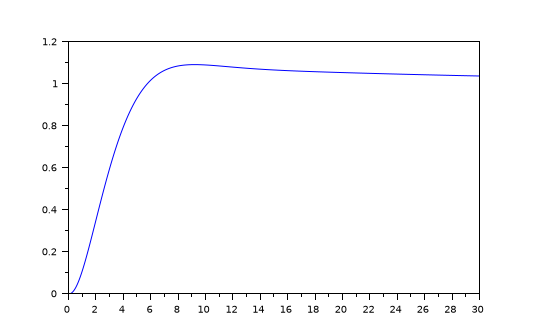

In [20]:
t=0:0.01:30;
gitxia=(K*(sarea*g)/.(1));

y=csim('step',t,gitxia);
plot(t,y)

Ikusten den bezala, gaindiketa nahiko ondop geratu da, beraz, ez  da beharrezkoa diseinua aldatzea.

In [ ]:
uitxia1=((sarea)/.(g));

u1=csim('step',t,uitxia1);
scf(1);
plot(t,u1)

K pixka bat jaitsiz, poloak moteltzen dira abiadura ere pixka bat jaitsiz.